In [13]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

col = ["wc","uwc","ewc","hc","sc","ac","fc","cpc","a"]

emotion_datasets = ["emotion_classification_1_clean.csv", "emotion_classification_2_clean.csv", "emotion_classification_3_clean.csv", "emotion_classification_4_clean.csv", "emotion_classification_5_clean.csv", "emotion_classification_6_clean.csv", "emotion_classification_7_clean.csv", "emotion_classification_8_clean.csv"]
emotion_data = []
for f in emotion_datasets:
    emotion_data.append(pd.read_csv(f))
emotion_data = pd.concat(emotion_data, axis=0, ignore_index=True)
emotion_data = emotion_data[['word_count', 'upper_word_count', 'ent_word_count', 'h_count', "s_count", "a_count", "f_count", "cons_punct_count", "affect"]]

tweet_datasets = ["crowdflower_clean.csv", "emoint_clean.csv", "tec_clean.csv"]
tweet_data = []
for f in tweet_datasets:
    d = pd.read_csv(f)
    tweet_data.append(pd.read_csv(f))
tweet_data = pd.concat(tweet_data, axis=0, ignore_index=True)
tweet_data = tweet_data[['word_count', 'upper_word_count', 'ent_word_count', 'h_count', "s_count", "a_count", "f_count", "cons_punct_count", "affect"]]


datasets = [emotion_data, tweet_data]

print(datasets[0].shape)
print(datasets[1].shape)

(362355, 9)
(17225, 9)


--> 0 (9, 9) 
 [[ 1.       nan  0.018  0.363  0.188    nan  0.143    nan -0.017]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [ 0.018    nan  1.    -0.011 -0.03     nan -0.019    nan -0.029]
 [ 0.363    nan -0.011  1.    -0.03     nan -0.017    nan -0.269]
 [ 0.188    nan -0.03  -0.03   1.       nan  0.045    nan  0.146]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [ 0.143    nan -0.019 -0.017  0.045    nan  1.       nan  0.254]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [-0.017    nan -0.029 -0.269  0.146    nan  0.254    nan  1.   ]]


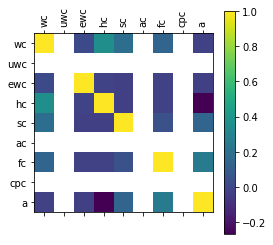

--> 1 (9, 9) 
 [[ 1.     0.046 -0.15   0.283  0.155    nan  0.111  0.176  0.095]
 [ 0.046  1.    -0.031 -0.004  0.02     nan -0.004  0.044  0.043]
 [-0.15  -0.031  1.    -0.032 -0.105    nan -0.068 -0.031 -0.165]
 [ 0.283 -0.004 -0.032  1.    -0.05     nan -0.027  0.026 -0.179]
 [ 0.155  0.02  -0.105 -0.05   1.       nan  0.025  0.002  0.201]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [ 0.111 -0.004 -0.068 -0.027  0.025    nan  1.    -0.019  0.231]
 [ 0.176  0.044 -0.031  0.026  0.002    nan -0.019  1.    -0.022]
 [ 0.095  0.043 -0.165 -0.179  0.201    nan  0.231 -0.022  1.   ]]


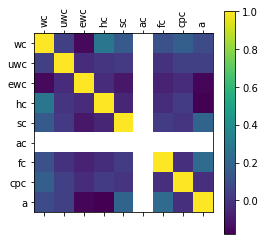

In [21]:
for i, dataset in enumerate(datasets):
    word_count = dataset["wc"].tolist()
    upper_word_count = dataset["uwc"].tolist()
    ent_word_count = dataset["ewc"].tolist()
    h_count = dataset["hc"].tolist()
    s_count = dataset["sc"].tolist()
    a_count = dataset["ac"].tolist()
    f_count = dataset["fc"].tolist()
    cons_punct_count = dataset["cpc"].tolist()
    affect = dataset["a"].tolist()

    corr = np.round(np.corrcoef([word_count, upper_word_count, ent_word_count, h_count, s_count, a_count, f_count, cons_punct_count, affect]), 3)
    print("-->", i, corr.shape, "\n", corr)

    dataset.columns = col
    
    plt.matshow(dataset.corr())
    plt.xticks(range(len(dataset.columns)), dataset.columns)
    plt.yticks(range(len(dataset.columns)), dataset.columns)
    plt.xticks(rotation=90)
    plt.colorbar()
    plt.show()

--> 0 (12, 12) 
 [[ 1.       nan  0.018  0.363  0.188    nan  0.143    nan  0.034 -0.034
   0.001 -0.003]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
     nan    nan]
 [ 0.018    nan  1.    -0.011 -0.03     nan -0.019    nan  0.023  0.
  -0.011 -0.021]
 [ 0.363    nan -0.011  1.    -0.03     nan -0.017    nan  0.324 -0.164
  -0.114 -0.116]
 [ 0.188    nan -0.03  -0.03   1.       nan  0.045    nan -0.315  0.321
   0.019 -0.014]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
     nan    nan]
 [ 0.143    nan -0.019 -0.017  0.045    nan  1.       nan -0.156 -0.034
  -0.006  0.279]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
     nan    nan]
 [ 0.034    nan  0.023  0.324 -0.315    nan -0.156    nan  1.    -0.552
  -0.339 -0.305]
 [-0.034    nan  0.    -0.164  0.321    nan -0.034    nan -0.552  1.
  -0.303 -0.272]
 [ 0.001    nan -0.011 -0.114  0.019    nan -0.006    nan -0.339 -0.303
   1.    -0.167]
 [-0.003  

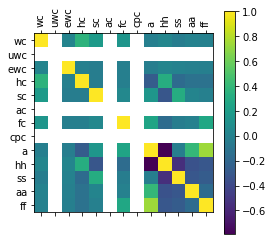

--> 1 (12, 12) 
 [[ 1.     0.046 -0.15   0.283  0.155    nan  0.111  0.176 -0.062 -0.017
   0.055  0.076]
 [ 0.046  1.    -0.031 -0.004  0.02     nan -0.004  0.044 -0.055  0.028
   0.051  0.001]
 [-0.15  -0.031  1.    -0.032 -0.105    nan -0.068 -0.031  0.169 -0.073
  -0.085 -0.086]
 [ 0.283 -0.004 -0.032  1.    -0.05     nan -0.027  0.026  0.215 -0.134
  -0.078 -0.074]
 [ 0.155  0.02  -0.105 -0.05   1.       nan  0.025  0.002 -0.254  0.187
   0.029  0.1  ]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
     nan    nan]
 [ 0.111 -0.004 -0.068 -0.027  0.025    nan  1.    -0.019 -0.122 -0.071
   0.082  0.231]
 [ 0.176  0.044 -0.031  0.026  0.002    nan -0.019  1.    -0.007  0.041
  -0.022 -0.031]
 [-0.062 -0.055  0.169  0.215 -0.254    nan -0.122 -0.007  1.    -0.671
  -0.294 -0.331]
 [-0.017  0.028 -0.073 -0.134  0.187    nan -0.071  0.041 -0.671  1.
  -0.214 -0.241]
 [ 0.055  0.051 -0.085 -0.078  0.029    nan  0.082 -0.022 -0.294 -0.214
   1.    -0.106]
 [ 0.07

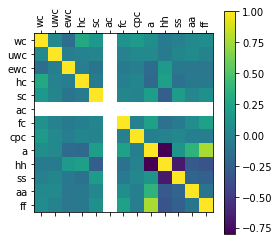

In [27]:
dataset2 = dataset.copy()
for i, dataset in enumerate(datasets):
   
    word_count = dataset["wc"].tolist()
    upper_word_count = dataset["uwc"].tolist()
    ent_word_count = dataset["ewc"].tolist()
    h_count = dataset["hc"].tolist()
    s_count = dataset["sc"].tolist()
    a_count = dataset["ac"].tolist()
    f_count = dataset["fc"].tolist()
    cons_punct_count = dataset["cpc"].tolist()
    affect = dataset["a"].tolist()
    
    hh, ss, aa, ff = [], [], [], []
    for element in affect: 
        if element == 0:
            hh.append(1)
            ss.append(0)
            aa.append(0)
            ff.append(0)
        elif element == 1: 
            hh.append(0)
            ss.append(1)
            aa.append(0)
            ff.append(0)
        elif element == 2: 
            hh.append(0)
            ss.append(0)
            aa.append(1)
            ff.append(0)
        elif element == 3: 
            hh.append(0)
            ss.append(0)
            aa.append(0)
            ff.append(1)
    
    dataset["hh"] = hh
    dataset["ss"] = ss
    dataset["aa"] = aa
    dataset["ff"] = ff
   
    corr = np.round(np.corrcoef([word_count, upper_word_count, ent_word_count, h_count, s_count, a_count, f_count, cons_punct_count, hh, ss, aa, ff]), 3)
    print("-->", i, corr.shape, "\n", corr)
    
    
    dataset.columns = ["wc","uwc","ewc","hc","sc","ac","fc","cpc","a", "hh", "ss", "aa", "ff"]
   
    plt.matshow(dataset.corr())
    plt.xticks(range(len(dataset.columns)), dataset.columns)
    plt.yticks(range(len(dataset.columns)), dataset.columns)
    plt.xticks(rotation=90)
    plt.colorbar()
    plt.show()